In [33]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import os

In [34]:
def extract_average_color(img):
    # calculate the average color of each row of our image
    avg_color_per_row = np.average(img, axis=0)

    # calculate the averages of our rows
    avg_colors = np.average(avg_color_per_row, axis=0)
    # so, convert that array to integers
    int_averages = np.array(avg_colors, dtype=np.uint8)
    return int_averages

In [35]:
imagePaths = os.getcwd() + '/ImagesFromObject'

In [36]:
# initialize the raw pixel intensities matrix, the features matrix,
# and labels list
rawImages = []
features = []
labels = []

In [37]:
for file in os.listdir(imagePaths):
    imagePath = imagePaths + '/' + file
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_average_color(image)
    rawImages.append(image)
    features.append(hist)
    labels.append(label)

In [38]:
clusters = KMeans(2, random_state= 40)
clusters.fit(features)

KMeans(n_clusters=2, random_state=40)

In [39]:
image_cluster = pd.DataFrame(labels, columns= ['image'])
image_cluster["ClusterID"] = clusters.labels_
image_cluster

,image,ClusterID
0,person5,1
1,person4,1
2,person0,1
3,person1,0
4,person3,1
5,person2,0


<Figure size 432x288 with 0 Axes>

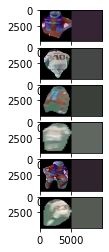

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
f, axarr = plt.subplots(6,1) 
for i in range(0,6):
    feature = features[i]
    image = cv2.resize(rawImages[i], (5000, 5000)) 
    height, width, _ = np.shape(image)
    average_image = np.zeros((height, width, 3), np.uint8)
    average_image[:] = feature
    axarr[i].imshow(np.hstack([image, average_image]))